In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = pd.read_csv(r"C:\Users\amita\Desktop\Deep Learning\RNN\RNN\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv")

In [3]:
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#WE NEED TO CONVERT TO A NP ARRAY AS IT CAN ONLY BE INPUT FOR RNN
training_set = train_dataset.iloc[:, 1:2].values #only take one index so we have a np array of one columns

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
training_set.shape

(1258, 1)

## Feature Scaling

In [7]:
# its better to use normalization for rnn where sigmoid activation fn is in the final op layer
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1))  # EVERY ONE WILL BE IN RANGE 0 TO 1

In [10]:
training_set_scaled = sc.fit_transform(training_set) #IT WILL FIT AND TRANSFORM IT(SCALE IT) FIR->MIN AND MAX AND THEN TRANSFORMS IT INTO 0 TO 1 RANGE AS PER NORMALIZATION FORMULA

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure with 60 timesteps and 1 output

In [13]:
#it means at each time t rnn will look at 60 stock prices ie 60 days before time t and time t and predict the next day output
#it takes 60 days past data to predict next day prediction
#20 financial days each month so 3 months data reqd

In [14]:
#X_train has stock prices of last 60 days
#y_train has the prediction of 61st day for every time t
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #append 60 days stock prices before the day of index i ie if i ==90 then X_train must have stock proces from day 20-89 etc, 0 is for column and i-60:i is the number of rows ie 60 last
    y_train.append(training_set_scaled[i, 0]) #index starts at 0 and i is row and 0 is col
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [16]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [17]:
X_train.shape   #each row has 60 elements and 0th index means 60 elements from 0th day to 59th day and has 1198 rows

(1198, 60)

In [19]:
y_train.shape #it has 1198 rows and just 1 col so ,

(1198,)

## Reshaping

In [20]:
#to add more indicators ie add a new dimension

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
#reshape(old array, new shape, order)
#our xtrain is 2d and we conver it to 3d
#to add dimensions go to keras documentation and add, go to recurrant layers and check for input shape, it should be 3d ie (batch_size,time_steps, indicator(new)) like indicator can be a new stock price of other company as they may be correalted etc
#batch_size = 1198 or x_train.shape[0] or no of rows
#time_steps = no of cols or 60 or x_train.shape[1]
#we only have 1 indicator we need to change if we have more ie we only predict the stock price beased on one indicator ie the previous stock prices, if we have other inp indicators like google stock price is dep on yahoo's so we add that ad well and make it 2

In [23]:
X_train.shape

(1198, 60, 1)

## Building a RNN - Stacked LSTM

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initialising a RNN

In [25]:
regressor = Sequential()

## Adding first LSTM layer and some dropout regularization

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
#units is the number of LSTM Cells(neurons), return_sequences = True as we are building a stacked lstm, after adding all lstm layers amke it false, input_shape = exact shape of X_train in 3d
#for input shape only mention time steps and indicator as the batch size is automatically taken
#units = 50 as to make it high dimensional as predicting stock price is not constant always and with 50 it would capture all the upward and downward trends properly
regressor.add(Dropout(0.2))
#drop 20% of neurons in the layer ie 20% of neurons will be ignored during forward and backward propogation or each iteration

## Adding a second LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#input_shape not req as before it was a first layer and since we are addign the second on top of first its the same shape however

## Adding a third LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding a fourth LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
#return sequence is not req as there are no more lstm layers in the next steps or set it to false

## Adding the output layer

In [30]:
regressor.add(Dense(units=1)) #units =- 1 or stock price at time t+1
#a simple single output layer as we only have one regressed output

## Compiling the RNN

In [31]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#adam for stochastic gradient descent
#loss for regression is mean squared error
#for regression no need of metrics to keep track  of it

## Fitting the RNN

In [32]:
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)
#we have a robust rnn we need to connect to trainig set by using the fit method
#network trains on batch size ie insted of rnn updating the weights after each entry it does after a batch size of 32 entries

Epoch 1/100

38/38 [==============================] - 9s 62ms/step - loss: 0.0427
Epoch 2/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0040
Epoch 13/100
38/38 [====

38/38 [==============================] - 2s 62ms/step - loss: 0.0016
Epoch 99/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0016
Epoch 100/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0014


## We added dropout to reduce overfitting
## 0.0015 loss is a  good number for no overfitting, if our loss is too small then overfitting ie our prediction will be too close to the actual prices

## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [33]:
test_dataset = pd.read_csv(r"C:\Users\amita\Desktop\Deep Learning\RNN\RNN\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv")

In [34]:
test_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [35]:
#WE NEED TO CONVERT TO A NP ARRAY AS IT CAN ONLY BE INPUT FOR RNN
real_stock_price = test_dataset.iloc[:, 1:2].values #only take one index so we have a np array of one columns, .values converts to a np array

In [36]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [37]:
# our model needs to capture the trend only not the exact prices

In [38]:
#topredict in jan we need to have 60 previous datapoints, so we need both training and test set because we need some points from dec 2016 and jan 2017 as well

In [39]:
dataset_total = pd.concat((train_dataset['Open'], test_dataset['Open']), axis = 0)
#we concat the original train and test and thenget the input for each prediction ie 60 previous for timt t then we will scale them so we only scale req points not all the testing
#concat only the col "Open" as they only cancat based on that , vertical concat axis = 0

In [41]:
dataset_total.shape  #1258+20

(1278,)

In [42]:
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 60:].values
#inputs are for each time t in the month of jan, for each day in jan we need 60 days previous ie 3 previous months
#lower bound is 1st fin day of jan 2017 - 60, upper bound = last fin day of jan 2017 - 60
#len(dataset_total) - len(test_dataset) ie last day of concat - 20 days would give jan 3rd ie first fin day of jan
#its -60 to everything 
#.values to convert to np array

In [43]:
inputs = inputs.reshape(-1,1) #to get right numpy shape as it wont be shaped properly, we get it in a line and a columns

In [44]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [45]:
inputs = sc.transform(inputs) 

In [46]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [47]:
inputs.shape

(80, 1)

In [48]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#(60,80) beacuse of only 20 days in jan

In [49]:
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [50]:
#in each line we have 60 previous stock prices

In [51]:
#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [52]:
#predicting
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#inverse_transform to ge tthe original scaling 

1/1 [==============================] - 2s 2s/step


In [53]:
predicted_stock_price

array([[791.70886],
       [789.138  ],
       [789.06726],
       [790.11993],
       [793.19604],
       [798.9061 ],
       [804.60016],
       [807.66113],
       [808.8038 ],
       [808.9092 ],
       [808.5618 ],
       [807.97046],
       [807.41504],
       [807.578  ],
       [808.3008 ],
       [812.4899 ],
       [819.14404],
       [826.7608 ],
       [831.6772 ],
       [829.089  ]], dtype=float32)

### Visualising the results

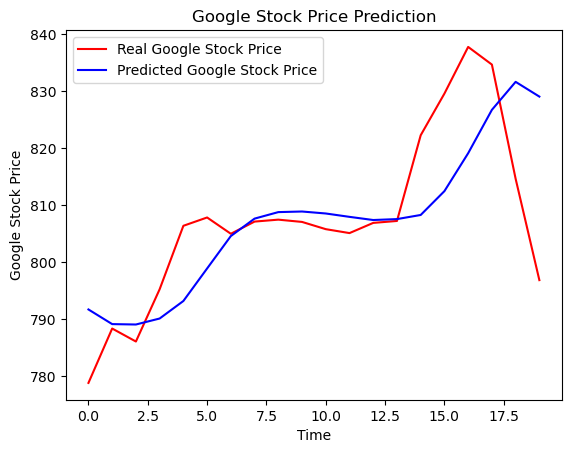

In [54]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Its almost showing the right trends, and stock prices cannot be predicted accurately , so its catching the trend properly

## It wont react properly to spikes but reacts properly for smooth changes

## To Improve:
### - Getting More Training Data
### - Increasing the number of timesteps
### - Adding some other indicators
### - Adding more LSTM Layers
### - Adding more neurons in each LSTM Layers